# Machine Learning - Homework 1
<br>

## Team Members
### - Abinash Biswal
### - Mounica Vuyyuru

<br><br><br><br>

# Code Summary
- This code uses object oriented programming. A KNN class is defined which initializes the objects.
- When an object is initialized the k value is taken as an argument.
- Each object has a method to print the following
    - Accuracy
    - Cross Validation scores
    - Confusion Matrix
    - Classification Report
- Apart from the class, three other functions are defined which do the following
    - Read the file and return variables
    - print an image
    - print the shape of numpy variables

In [3]:
#-------------------------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import h5py

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

from sklearn.cluster import KMeans
import cv2

#-------------------------------------------------------------------------------------------------------------------

class KNN_Class:
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.model = KNeighborsClassifier(n_neighbors=self.n_neighbors)

    def train_model(self, trainingImages, trainingLabels):
        self.model.fit(trainingImages, trainingLabels)

    def print_accuracy(self, testingImages, testingLabels):
        test_accuracy = self.model.score(testingImages, testingLabels)
        print(f"\nTest Accuracy: {test_accuracy * 100:.2f} %\n")

    def print_cross_validation(self, trainingImages, trainingLabels, cv=10):
        cv_scores = cross_val_score(self.model, trainingImages, trainingLabels, cv=cv, scoring='accuracy')
        
        # Print cross-validation scores for each fold
        print("\nCross-validation scores for each fold: ")
        for i, score in enumerate(cv_scores):
            print(f"Fold {i+1}: {score * 100:.2f} %")
        
        # Print mean and standard deviation of the cross-validation scores
        mean_score = np.mean(cv_scores)
        std_dev = np.std(cv_scores)
        
        print(f"\nMean cross-validation score: {mean_score * 100:.2f} %")
        print(f"Standard deviation of cross-validation scores: {std_dev * 100:.2f} %\n")
        

    def print_confusion_matrix(self, testingImages, testingLabels):

        print()

        test_predictions = self.model.predict(testingImages)
        self.test_predictions = test_predictions
        
        # Compute the confusion matrix
        cm = confusion_matrix(testingLabels, test_predictions)
        
        # Display the confusion matrix using Seaborn
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', 
                    xticklabels=np.unique(testingLabels), 
                    yticklabels=np.unique(testingLabels),
                    linewidths=0.5,  # Width of grid lines
                    linecolor='black')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()        
        print()


    def print_classification_report(self, testingLabels, test_predictions):

        precision, recall, f1, _ = precision_recall_fscore_support(testingLabels, test_predictions, average=None)        
        
        self.report = f'\n-----------------------------------------------------\nClassification Report for k = {self.n_neighbors}:\n\n{classification_report(testingLabels, test_predictions)}\n-----------------------------------------------------\n'

        print(self.report)

#-------------------------------------------------------------------------------------------------------------------

def readFileAndReturn4Variables (location) :   

    with h5py.File(location, 'r') as hdFileHandle:
        
        # Access the 'train' and 'test' datasets
        train = hdFileHandle.get('train')
        test = hdFileHandle.get('test')
        
        # Extract the data and labels from the 'train' dataset
        trainingImages = train.get('data')[:]
        trainingLabels = train.get('target')[:]
        
        # Extract the data and labels from the 'test' dataset
        testingImages = test.get('data')[:]
        testingLabels = test.get('target')[:]

    return [trainingImages , trainingLabels , testingImages , testingLabels]

#-------------------------------------------------------------------------------------------------------------------

def printImageFrom1DArray (image1DArray):
    
    img = list()
    count = 0
    row = list()
    
    for i in image1DArray:
        
        if count == 16:
            img.append(row)
            row = list()
            count = 0
            
        row.append(i)
        count += 1
    
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

#-------------------------------------------------------------------------------------------------------------------

def printShapeOfAllVariables (trainingImages, trainingLabels, testingImages, testingLabels):
    print('\nShape Of Variables\n')
    print(f'trainingImages -> {trainingImages.shape}')
    print(f'trainingLabels -> {trainingLabels.shape}')
    print(f'testingImages  -> {testingImages.shape}')
    print(f'testingLabels  -> {testingLabels.shape}\n')
    
#-------------------------------------------------------------------------------------------------------------------

In [4]:
trainingImages , trainingLabels , testingImages , testingLabels = readFileAndReturn4Variables('data.h5')

In [5]:
printShapeOfAllVariables(trainingImages , trainingLabels , testingImages , testingLabels)


Shape Of Variables

trainingImages -> (7291, 256)
trainingLabels -> (7291,)
testingImages  -> (2007, 256)
testingLabels  -> (2007,)



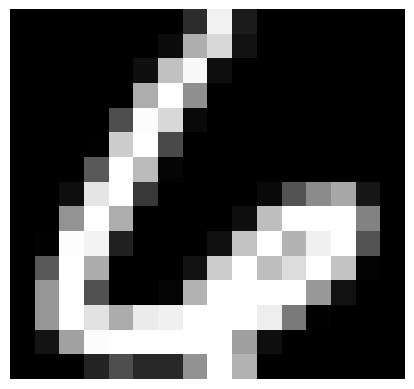

In [6]:
printImageFrom1DArray(testingImages[np.random.randint(0, len(testingImages))])

<br><br><br><br>
# k = 5

In [8]:
k1 = KNN_Class(5)

In [9]:
k1.train_model(trainingImages , trainingLabels)

In [10]:
k1.print_accuracy(testingImages, testingLabels)


Test Accuracy: 94.47 %



In [11]:
k1.print_cross_validation(trainingImages, trainingLabels)


Cross-validation scores for each fold: 
Fold 1: 95.89 %
Fold 2: 97.26 %
Fold 3: 96.84 %
Fold 4: 95.47 %
Fold 5: 97.12 %
Fold 6: 96.57 %
Fold 7: 96.57 %
Fold 8: 94.10 %
Fold 9: 97.39 %
Fold 10: 96.84 %

Mean cross-validation score: 96.41 %
Standard deviation of cross-validation scores: 0.95 %



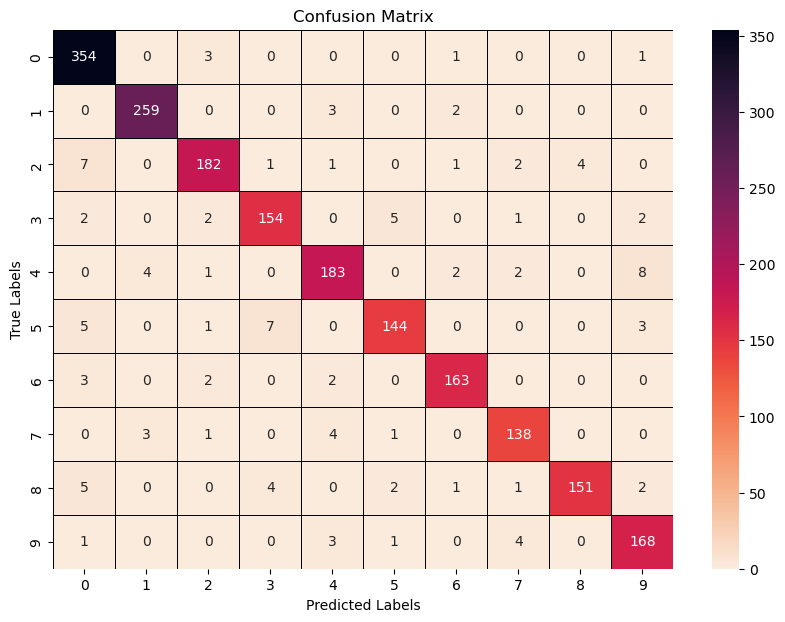

In [12]:
k1.print_confusion_matrix(testingImages, testingLabels)

In [13]:
k1.print_classification_report(testingLabels, k1.test_predictions)


-----------------------------------------------------
Classification Report for k = 5:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       359
           1       0.97      0.98      0.98       264
           2       0.95      0.92      0.93       198
           3       0.93      0.93      0.93       166
           4       0.93      0.92      0.92       200
           5       0.94      0.90      0.92       160
           6       0.96      0.96      0.96       170
           7       0.93      0.94      0.94       147
           8       0.97      0.91      0.94       166
           9       0.91      0.95      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.94      0.94      0.94      2007

-----------------------------------------------------



<br><br><br><br>
# K = 10

In [15]:
k2 = KNN_Class(10)

In [16]:
k2.train_model(trainingImages , trainingLabels)

In [17]:
k2.print_accuracy(testingImages, testingLabels)


Test Accuracy: 93.57 %



In [18]:
k2.print_cross_validation(trainingImages, trainingLabels)


Cross-validation scores for each fold: 
Fold 1: 96.30 %
Fold 2: 96.57 %
Fold 3: 95.75 %
Fold 4: 95.34 %
Fold 5: 95.61 %
Fold 6: 96.16 %
Fold 7: 96.02 %
Fold 8: 93.96 %
Fold 9: 96.84 %
Fold 10: 96.02 %

Mean cross-validation score: 95.86 %
Standard deviation of cross-validation scores: 0.76 %



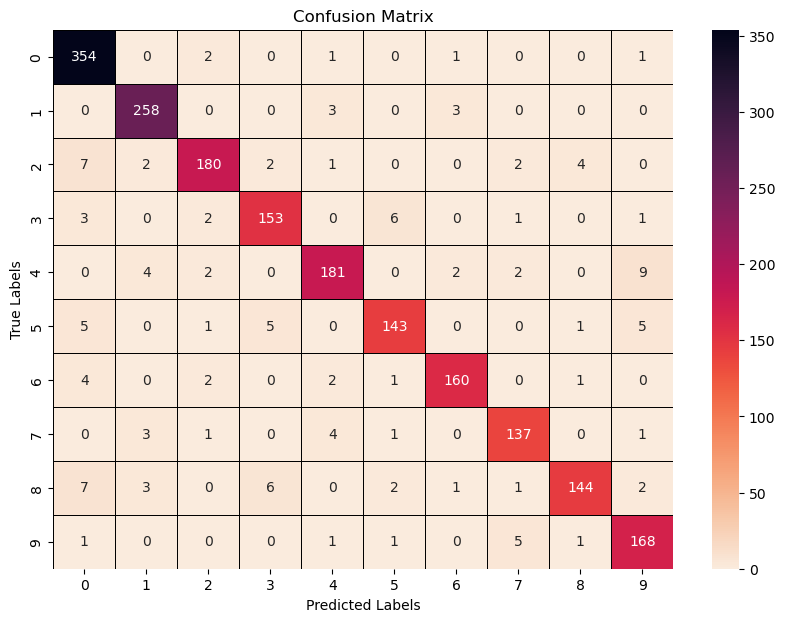

In [19]:
k2.print_confusion_matrix(testingImages, testingLabels)

In [20]:
k2.print_classification_report(testingLabels, k2.test_predictions)


-----------------------------------------------------
Classification Report for k = 10:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       359
           1       0.96      0.98      0.97       264
           2       0.95      0.91      0.93       198
           3       0.92      0.92      0.92       166
           4       0.94      0.91      0.92       200
           5       0.93      0.89      0.91       160
           6       0.96      0.94      0.95       170
           7       0.93      0.93      0.93       147
           8       0.95      0.87      0.91       166
           9       0.90      0.95      0.92       177

    accuracy                           0.94      2007
   macro avg       0.94      0.93      0.93      2007
weighted avg       0.94      0.94      0.94      2007

-----------------------------------------------------



<br><br><br><br>
# K = 15

In [22]:
k3 = KNN_Class(15)

In [23]:
k3.train_model(trainingImages , trainingLabels)

In [24]:
k3.print_accuracy(testingImages, testingLabels)


Test Accuracy: 93.02 %



In [25]:
k3.print_cross_validation(trainingImages, trainingLabels)


Cross-validation scores for each fold: 
Fold 1: 95.75 %
Fold 2: 96.43 %
Fold 3: 94.51 %
Fold 4: 94.38 %
Fold 5: 94.65 %
Fold 6: 95.88 %
Fold 7: 96.02 %
Fold 8: 93.28 %
Fold 9: 95.34 %
Fold 10: 94.24 %

Mean cross-validation score: 95.05 %
Standard deviation of cross-validation scores: 0.94 %



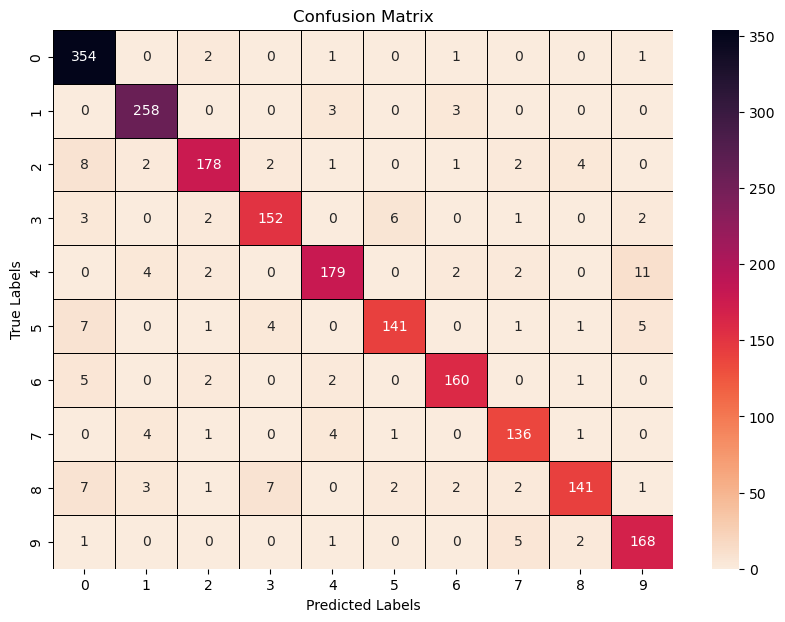

In [26]:
k3.print_confusion_matrix(testingImages, testingLabels)

In [27]:
k3.print_classification_report(testingLabels, k3.test_predictions)


-----------------------------------------------------
Classification Report for k = 15:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       359
           1       0.95      0.98      0.96       264
           2       0.94      0.90      0.92       198
           3       0.92      0.92      0.92       166
           4       0.94      0.90      0.92       200
           5       0.94      0.88      0.91       160
           6       0.95      0.94      0.94       170
           7       0.91      0.93      0.92       147
           8       0.94      0.85      0.89       166
           9       0.89      0.95      0.92       177

    accuracy                           0.93      2007
   macro avg       0.93      0.92      0.93      2007
weighted avg       0.93      0.93      0.93      2007

-----------------------------------------------------



<br><br><br>
# SIFT Algorithm Implementation
<br><br><br>

1. The code below uses the cv2 library
2. First a function is defined to extract the descriptors of all the images.
3. We can't use these descriptors directly in our KNN model, because different descriptors have different number of keypoints. We need to make them uniform, before they can be fed to the KNN model. So we do then on the training and the testing images
4. First, we get rid of all the empty descriptors
5. Once that is done, we use clutering to group similar features from the descriptors.
6. Then we map each image to a cluster and create a histogram and finally use this histogram for our training and testing purposes

In [30]:
def readImagesAndReturnFullDescriptorsArray (trainingImages) :

    descriptorsArray = list()
    
    import cv2
    sift_object = cv2.SIFT_create()

    for i in trainingImages:
        
        one_d_image = (i * 255).astype(np.uint8)
        two_d_image = one_d_image.reshape(16,16)

        keypoints , descriptorsForThisTwoDImage = sift_object.detectAndCompute(two_d_image, None)


        if descriptorsForThisTwoDImage is not None:
            #print(f'Shape of array(descriptorsForThisTwoDImage) = {descriptorsForThisTwoDImage.shape}\t length of keypoints = {len(keypoints)}')
            descriptorsArray.append(descriptorsForThisTwoDImage)
        else:
            #print(f'Shape of array(descriptorsForThisTwoDImage) = No shape\t length of keypoints = {len(keypoints)}')
            #printImageFrom1DArray(i)
            descriptorsArray.append(np.array([]))

    return descriptorsArray

In [31]:
extractedDescriptors = readImagesAndReturnFullDescriptorsArray(trainingImages)

In [32]:
nonEmptyDescriptorsList = []

# Step 2: Loop through each descriptor
for descriptor in extractedDescriptors:
    if descriptor.size > 0:  # Check if the descriptor is not empty
        nonEmptyDescriptorsList.append(descriptor)  # Add to the list

# Step 3: Stack the non-empty arrays into one single array
allDescriptors_npArray = np.vstack(nonEmptyDescriptorsList)


In [33]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=100)
kmeans.fit(allDescriptors_npArray)

cluster_centers = kmeans.cluster_centers_

In [34]:
def mapImageToClusters(imageDescriptors, kmeans):
    if imageDescriptors.size > 0:  # Check if there are descriptors
        return kmeans.predict(imageDescriptors)  # Get cluster labels
    else:
        return []  # No descriptors

# Create a list to hold the cluster assignments for each image
imgMappedToClusters = []
for descriptor in extractedDescriptors:
    imgClusters = mapImageToClusters(descriptor, kmeans)
    imgMappedToClusters.append(imgClusters)


In [35]:
def createHistogram(clusterAssignments, n_clusters):
    histogram = np.zeros(n_clusters)  # Create a histogram with zeros
    for clusterLabel in clusterAssignments:
        histogram[clusterLabel] += 1  # Count occurrences of each cluster
    return histogram

# Create histograms for each image
histograms = []
for cluster_assignment in imgMappedToClusters:
    hist = createHistogram(cluster_assignment, 100)
    histograms.append(hist)


<br><br><br><br><br><br>

In [37]:
# Extract descriptors for testing images (similar to your training process)
extractedTestDescriptors = readImagesAndReturnFullDescriptorsArray(testingImages)

In [38]:
# Map each test image's descriptors to cluster labels
imagesTestMappedToClusters = []
for descriptor in extractedTestDescriptors:
    test_image_clusters = mapImageToClusters(descriptor, kmeans)
    imagesTestMappedToClusters.append(test_image_clusters)


In [39]:
# Create histograms for each test image
test_histograms = []
for cluster_assignment in imagesTestMappedToClusters:
    hist = createHistogram(cluster_assignment, 100)
    test_histograms.append(hist)


<br><br><br><br><br><br>

In [41]:
k4 = KNN_Class(15)

In [42]:
k4.train_model(histograms , trainingLabels)

In [43]:
k4.print_accuracy(test_histograms, testingLabels)


Test Accuracy: 64.72 %



In [44]:
k4.print_cross_validation(trainingImages, trainingLabels)


Cross-validation scores for each fold: 
Fold 1: 95.75 %
Fold 2: 96.43 %
Fold 3: 94.51 %
Fold 4: 94.38 %
Fold 5: 94.65 %
Fold 6: 95.88 %
Fold 7: 96.02 %
Fold 8: 93.28 %
Fold 9: 95.34 %
Fold 10: 94.24 %

Mean cross-validation score: 95.05 %
Standard deviation of cross-validation scores: 0.94 %



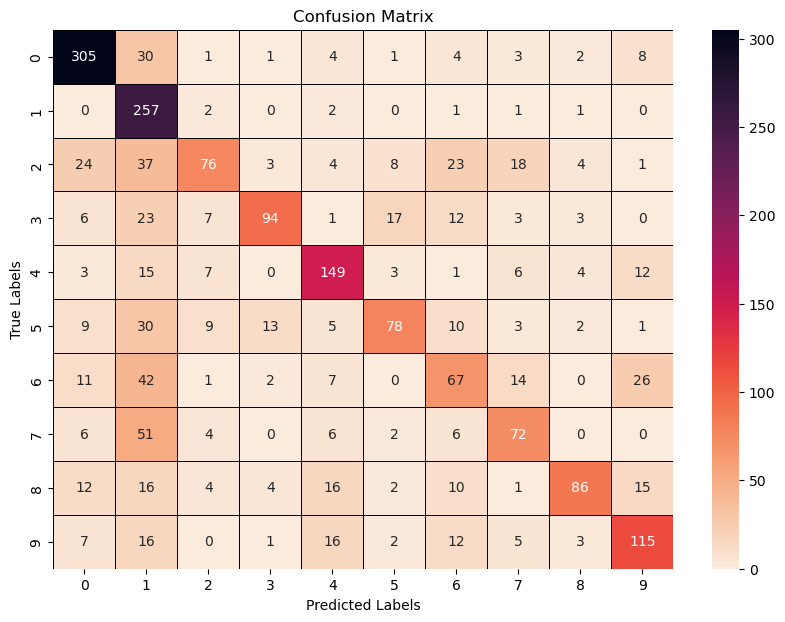

In [45]:
k4.print_confusion_matrix(test_histograms, testingLabels)

In [46]:
k4.print_classification_report(testingLabels, k4.test_predictions)


-----------------------------------------------------
Classification Report for k = 15:

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       359
           1       0.50      0.97      0.66       264
           2       0.68      0.38      0.49       198
           3       0.80      0.57      0.66       166
           4       0.71      0.74      0.73       200
           5       0.69      0.49      0.57       160
           6       0.46      0.39      0.42       170
           7       0.57      0.49      0.53       147
           8       0.82      0.52      0.63       166
           9       0.65      0.65      0.65       177

    accuracy                           0.65      2007
   macro avg       0.67      0.61      0.62      2007
weighted avg       0.67      0.65      0.64      2007

-----------------------------------------------------



In [47]:
# Printing All the Classification report to an external .txt file called 'classification_report.txt'

with open('report.txt', 'w') as f:
    f.write(k1.report)
    f.write(k2.report)
    f.write(k3.report)
    f.write('\n\n\n\n\nSIFT ALGORITHM IMPLEMENTATION')
    f.write(k4.report)